In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv('baseball.csv')

In [130]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [131]:
df.shape

(1232, 15)

In [132]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [134]:
df.Year.values

array([2012, 2012, 2012, ..., 1962, 1962, 1962], dtype=int64)

So this data contains data till 2012 but the moneyball analysis that was performed by Oakland A's for the first time was before the 2002 season. So we will keep the data till 2001 only

In [135]:
full_df = df
df = df[df['Year'] <= 2001]

In [136]:
df.shape

(902, 15)

In [137]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


In [138]:
df.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [139]:
# reset the index to start it from 0
df = df.reset_index()

In [140]:
df.head()

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


In [142]:
color = df['Playoffs'].apply(lambda x: 'green' if x == 0 else 'coral')

In [143]:
df.head()

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


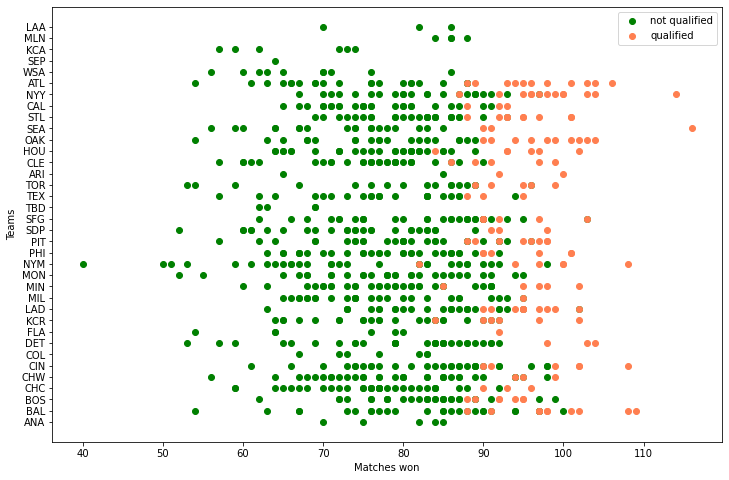

In [145]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(df[df['Playoffs'] == 0]['W'], df[df['Playoffs'] == 0]['Team'], c = 'green', label = 'not qualified')
plt.scatter(df[df['Playoffs'] == 1]['W'], df[df['Playoffs'] == 1]['Team'], c = 'coral', label = 'qualified')
plt.xlabel('Matches won')
plt.ylabel('Teams')
plt.legend()

From this table we try to predict on average how many league are needed to be won to qualify for playoffs with a probability of 90% or above.

In [146]:
for i in range(90, 101):
    print(f'For qualifying with probability {i}%, wins needed are:', df[df['Playoffs'] == 0].W.quantile(i/100))

For qualifying with probability 90%, wins needed are: 90.0
For qualifying with probability 91%, wins needed are: 90.0
For qualifying with probability 92%, wins needed are: 90.0
For qualifying with probability 93%, wins needed are: 91.0
For qualifying with probability 94%, wins needed are: 91.0
For qualifying with probability 95%, wins needed are: 92.0
For qualifying with probability 96%, wins needed are: 93.0
For qualifying with probability 97%, wins needed are: 94.0
For qualifying with probability 98%, wins needed are: 95.05999999999995
For qualifying with probability 99%, wins needed are: 97.52999999999997
For qualifying with probability 100%, wins needed are: 103.0


Oakland A's sabermatrician Paul Depodesta predicted that if a team won at least 95 league games then it has very high chances of qualifying. From the above table we can see that he must have concluded this by also considering that there is still a 2% chance for a team to win at least 95 games and still not qualify, but that is significantly less. Therefore this target of winning at least 95 games was indeed a very rational one. 

Now the target was set, win atleast 95 games. Baseball has many analogies to cricket. One of them is that, in a match, the team which scores more runs, wins. In short the run difference (runs scored - runs conceded) for the winning team is larger. Can we use this fact to somehow model this situation for the run difference in the entire tournament for each team and see if this run difference has any effect on the number of games won?

In [147]:
df['RD'] = df['RS'] - df['RA']

In [148]:
df.head()

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [149]:
df.corr(method = 'pearson')

,index,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
index,1.000000,-9.986709e-01,-0.484551,-0.480807,-0.004241,-0.470721,-0.518911,-0.433440,-0.111469,-0.405830,-0.422142,0.025756,0.385843,0.168670,-1.220787e-03
Year,-0.998671,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.415645,0.426403,-0.027085,-0.335533,-0.122668,-4.316055e-19
RS,-0.484551,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.135743,0.323624,0.056206,0.091057,0.039787,5.375395e-01
RA,-0.480807,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.539387,0.382416,-0.037402,0.909908,0.895110,-5.441052e-01
W,-0.004241,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.747960,-0.235038,0.108128,-0.633657,-0.646920,9.385150e-01
OBP,-0.470721,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.146153,0.300446,-0.003827,0.052899,-0.008316,4.942505e-01
SLG,-0.518911,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.217315,0.341013,0.012873,0.101632,0.080376,4.284077e-01
BA,-0.433440,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.156881,0.229791,-0.001805,0.219021,0.231918,4.421417e-01
Playoffs,-0.111469,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,NaN,NaN,0.009831,-0.495725,-0.510097,5.662745e-01
RankSeason,-0.405830,4.156449e-01,0.135743,0.539387,-0.747960,0.146153,0.217315,0.156881,NaN,1.000000,0.352961,0.052870,0.141905,0.235886,-5.703690e-01


From the very high correlation coefficient of RD (Run Difference) and W (wins), which is 0.9385, we can say that for teams with higher run difference, the number of wins is also larger.

We can as well see this by a scatter plot between wins and run difference

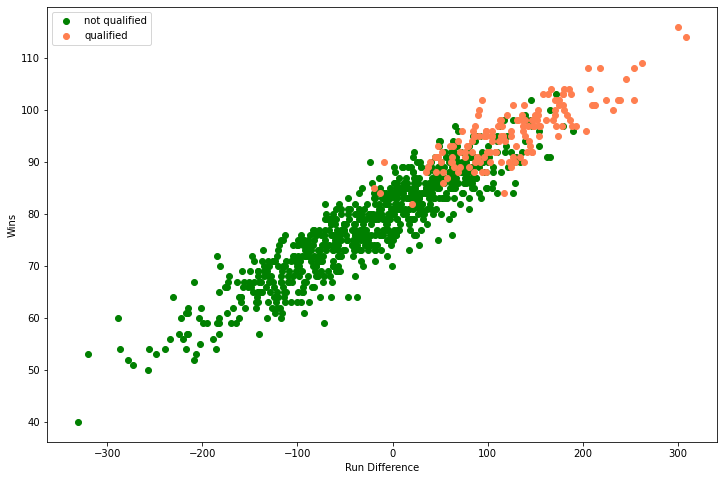

In [150]:
fig = plt.figure(figsize = (12, 8))
# plt.scatter(df['W'], df['RD'], c = color, label = color)
# plt.legend()
plt.scatter(df[df['Playoffs'] == 0]['RD'], df[df['Playoffs'] == 0]['W'], c = 'green', label = 'not qualified')
plt.scatter(df[df['Playoffs'] == 1]['RD'], df[df['Playoffs'] == 1]['W'], c = 'coral', label = 'qualified')
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.legend()

This plot establishes that having a higher run differential for the entire tournament means more wins.

Now to connect this with the earlier finding, we need to predict the run difference needed for winning 95 games. For this we will use a linear regression model, as the plot above also represents a linear relation between run difference and wins. 

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
run_difference_model = LinearRegression()

In [163]:
x = np.array(df['W']).reshape(-1, 1)
y = np.array(df['RD']).reshape(-1, 1)

In [164]:
run_difference_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
run_difference_model.coef_

array([[8.32794581]])

In [166]:
run_difference_model.intercept_

array([-673.57570548])

So we have got the OLS regression equation,

$\hat{RD}$ = -673.5757054841915 + 8.32794581 * ${W}$

On plugging in the target for wins i.e. ${W}$ = 95, we solve the equation to get the predicted Run difference, RD.

RD = -673.5757054841915 + 8.32794581 * 95

In [167]:
required_rd = 8.32794581*95 - 673.5757054841915
print(f'The run difference required to win 95 games is {required_rd}')

The run difference required to win 95 games is 117.57914646580844


Now through this the strategy of the Oakland A's was to select a team that would score nearly 118 runs more than they concede. For this they needed to know, the players they have to target for signing to play for them. Jason Giambi was leaving the Oakland A's and now they had to bring in batters whose stats would ensure that the team achieved run difference of at least 118 runs, and one component was to figure out how to score more runs. 

Now the question is what stats to select for this recruitment. Traditionally, the way a batter (analogous to batter in cricket (Sidenote : The terminology has changed from batsman to batter in cricket as well)) or pitcher (analogous to bowler in cricket) was judged was just by the conviction of the scouts, while they saw them play. The scouts themselves were retired baseball players and a lot of times they judged players just by their appearance. The only stats that were somewhat considered were superficial of the actual abilities of the players. This included the number of home runs, stolen bases and batting average. They were oblivious to the stats that spoke for the so called 'unfit' players. However it was Oakland A's Paul Depodesta and Billy Beane who argued that batting average is overvalued, while On-base percentage and Slugging percentage were more important indicators for the batting ability. 
Let's verify this claim

In [168]:
from sklearn.linear_model import LinearRegression
run_scored_model = LinearRegression()
X = df[['OBP', 'SLG', 'BA']]
y = df['RS']
run_scored_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
run_scored_model.coef_

array([2917.42140821, 1637.92766577, -368.96606009])

In [170]:
run_scored_model.score(X, y)

0.9302016258786281

The claim indeed is right, as the coefficient corresponding to 'BA' is highly negative, while that for 'OBP' and 'SLG' is highly positive. Let's see if removing 'BA' from the features adjusted R^2 value that is given by model.score(X, y)

In [171]:
from sklearn.linear_model import LinearRegression
run_scored_model = LinearRegression()
X = df[['OBP', 'SLG']]
y = df['RS']
run_scored_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
run_scored_model.coef_

array([2737.76802227, 1584.90860546])

In [173]:
run_scored_model.intercept_

-804.6270610622403

In [174]:
run_scored_model.score(X, y)

0.9295810608096599

There is a very slight drop in the R^2 value, so we can safely choose to ignore 'BA' to predict the runs scored. So we get the OLS regression equation,

$\hat{RS}$ = -804.6270610622403 + 2737.76802227 * $OBP$ + 1584.90860546 * ${SLG}$

Now we can similarly predict the runs allowed i.e. RA using Opposition On-base percentage (OOBP) and Opposition slugging percentage (OSLG). 

In [175]:
df.head()

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [176]:
df[['OOBP', 'OSLG']].isnull().sum()

OOBP    812
OSLG    812
dtype: int64

For simplicity we drop the rows having null values

In [177]:
ra_df = df.dropna(subset=['OOBP', 'OSLG'])

In [178]:
ra_df.shape

(90, 17)

In [179]:
from sklearn.linear_model import LinearRegression
run_allowed_model = LinearRegression()
X = ra_df[['OOBP', 'OSLG']]
y = ra_df['RA']
run_allowed_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
run_allowed_model.intercept_

-837.3778886133363

In [181]:
run_allowed_model.coef_

array([2913.59948582, 1514.28595842])

$\hat{RA}$ = -837.3778886133363 + 2913.59948582 * $OOBP$ + 1514.28595842 * $OSLG$

Now considering that much focus was given to recruiting batters, if we assume that the OOBP and OSLG of Oakland A's will remain the same as it was in the previous year, we can predict how many runs will Oakland A's concede in the 2002 season.

In [182]:
df[(df['Year'] == 2001) & (df['Team'] == 'OAK')].index

Int64Index([20], dtype='int64')

In [183]:
OOBP_2001 = df[(df['Team'] == 'OAK') & (df['Year'] == 2001)].loc[20, 'OOBP']
OSLG_2001 = df[(df['Team'] == 'OAK') & (df['Year'] == 2001)].loc[20, 'OSLG']
print(f"OOBP of Oakland A's in 2001 = {OOBP_2001}")
print(f"OSLG of Oakland A's in 2001 = {OSLG_2001}")

OOBP of Oakland A's in 2001 = 0.308
OSLG of Oakland A's in 2001 = 0.38


Given this we predict that runs allowed by Oakland A's in 2002 season will be 

In [184]:
print(run_allowed_model.predict(np.array([OOBP_2001, OSLG_2001]).reshape(1, -1))[0])

635.4394172160479


In [198]:
print(f'Given that they will allow nearly 636 runs in the season, in order to keep a run difference of 118 they'
      f' need to score {636 + 118} runs in the season') 

Given that they will allow nearly 636 runs in the season, in order to keep a run difference of 118 they need to score 754 runs in the season


This was their player recruitment strategy, they looked for players who would bring the OBP and SLG to a level where the runs scored; as predicted by our OLS equation for RS, will be 754. Precisely, 

754 = -804.6270610622403 + 2737.76802227 * $OBP$ + 1584.90860546 * ${SLG}$

So they focussed on OBP and SLG while recruiting the players, and since they knew that all the other teams would just consider batting average, home runs and stolen bases for the recruitment, they were confident that they would get the players they want at a low price, which they eventually did!

Now that we have uncovered the strategy used by the Oakland A's, let's see if that worked by checking the data for 2002 that is stored in full_df.

In [186]:
Oak_2002 = full_df[(full_df['Year'] == 2002) & (full_df['Team'] == 'OAK')]
Oak_2002

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
320,OAK,AL,2002,800,654,103,0.339,0.432,0.261,1,1.0,4.0,162,0.315,0.384


In [189]:
print(f"In 2002, given the OOBP and OSLG our model predicts the runs allowed by Oakland A's is {run_allowed_model.predict(np.array(Oak_2002.loc[320, ['OOBP', 'OSLG']]).reshape(1, -1))[0]}")

In 2002, given the OOBP and OSLG our model predicts the runs allowed by Oakland A's is 661.8917574504227


Comparing it with the actual data, shows that actual runs allowed in 2002 was 654, which is very close to 661.8917574504227

In [190]:
print(f"In 2002, given the OBP and SLG our model predicts the runs scored by Oakland A's is {run_scored_model.predict(np.array(Oak_2002.loc[320, ['OBP', 'SLG']]).reshape(1, -1))[0]}")

In 2002, given the OBP and SLG our model predicts the runs scored by Oakland A's is 808.1568160466265


Again a spot on prediction of 808.1568160466265 as compared to the actual runs scored in 2002, i.e. 800

In [191]:
print(f'This brings the run difference to 808.1568160466265 - 661.8917574504227 = {808.1568160466265 - 661.8917574504227}')

This brings the run difference to 808.1568160466265 - 661.8917574504227 = 146.26505859620386


In [192]:
print(f'This is again close to the actual run difference of 800 - 654 = {800 - 654}')

This is again close to the actual run difference of 800 - 654 = 146


In fact, almost identical!

Just one more thing remains: to check if this run difference predicts the correct wins. Earlier we regressed run difference on wins, as we wanted to know the predicted value of run difference for 95 wins, but now we will regress wins on run difference to see the predicted value of wins, given the run difference.

In [193]:
from sklearn.linear_model import LinearRegression
wins_model = LinearRegression()
X = np.array(df['RD']).reshape(-1, 1)
y = df['W']
wins_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Drum rolls

In [195]:
print(f'The predicted wins for a run difference of {808.1568160466265 - 661.8917574504227} is {wins_model.predict(np.array([808.1568160466265 - 661.8917574504227]).reshape(1, -1))[0]}')

The predicted wins for a run difference of 146.26505859620386 is 96.35118968785162


In fact, Oakland A's won 103 games in the season.

Oakland A's qualified for the playoffs with a league ranking of 1, but could not win. Billy Beane and Paul DePodesta believed that in a 162-game season, luck would be compensated for and it won't really affect the final outcome, while skills will be the ultimate factor. So they focussed on preparing a team that could qualify for playoffs, now what happens in playoffs can't be predicted. It provides a very small sample size and through the course of those knockout stages, that luck factor; just a single moment of brilliance can turn any game towards any team. So they believed that their method will work and take them to the playoffs, and it did.

Well, not everyone enjoyed seeing Oakland A's spending less and winning more, especially the teams with very big payrolls, and the scouts whose traditional ways of recruitment were being challenged. They would rather vent their frustration by commenting that what the Oakland A's did, was just a fluke, and their method does not work. On hearing this, Paul DePodesta would say to himself :-

## “I hope they continue to believe that our way doesn’t work. It buys us a few more years.”